# Analisis de evasión de clientes en TelecomX

## Introducción

Es sabido que la clave para el exito de cualquier negocio es la calidad brindada a los clientes con tal de retenerlos, y el saber el porque abandonan lo es aún más.

La perdida de clientes es un indicador critico para cualquier empresa, ya que la misma puede influir directamente en los ingresos o en el propio crecimiento de la empresa.

Telecom X ha detectado una tasa significativa de abandono de clientes, el objetivo de este analisis será determinar el comportamiento y las claves que llevaron a los clientes a abandonar la compañia.

In [2]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import pandas as pd
import numpy as np
import requests
import json

# Extracción de datos

In [3]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

datos = requests.get('https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json')
df_clientes = json.loads(datos.text)
df_clientes_normalizado = pd.json_normalize(df_clientes)

columnas = df_clientes_normalizado.columns

pd.set_option('future.no_silent_downcasting', True)

# Conociendo el conjunto de datos

Una vez extraido los datos, en base al analisis realizado sobre los registros y que se almacena en cada uno, deducimos lo siguiente:



---


* customerID = id del cliente, tipo de dato OBJETO
* Churn = Indica si el cliente sigue o no en la empresa, tipo de dato OBJETO, cambiar a BOOL
* customer.gender = sexo del cliente, tipo de dato OBJETO
* customer.SeniorCitizen = indica si el cliente es jubilado o no, tipo de dato INT64, cambiar a BOOL
* customer.Partner = indica si tiene pareja/cónyuge o no, tipo de dato OBJETO, cambiar a BOOL
* customer.Dependents = Indica si tiene personas que dependan economicamente de el (hijos, cónyuge, padres, etc), tipo de dato OBJETO, cambiar a BOOL
* customer.tenure = indica los meses que el cliente ha estado ligado a la empresa
* phone.PhoneService = indica si el cliente tiene o no servicio telefonico, tipo de dato OBJETO, cambiar a BOOL
* phone.MultipleLines = indica si tiene multiples lineas telefonicas o si no tiene servicio telefonico
* internet.InternetService = indica el tipo de servicio de internet que tiene el cliente (DSL o Fibra optica) o si no tiene servicio de internet
* internet.OnlineSecurity = indica si tiene seguridad online o si no tiene servicio de internet
* internet.OnlineBackup = indica si tiene un servicio de copia de seguridad, o si no tiene servicio de internet
* internet.DeviceProtection = indica si tiene un servicio de protección de dispositivos, o si no tiene servicio de internet
* internet.TechSupport = indica si tiene un servicio de soporte tecnologico o si no tiene servicio de internet
* internet.StreamingTV = indica si tiene un servicio de Streaming de tv o si no tiene servicio de internet
* internet.StreamingMovies = indica si tiene un servicio de Streaming de peliculas o si no tiene servicio de internet
* account.Contract = indica el tipo de contrato (Un año, mes a mes, 2 años)
* account.PaperlessBilling = indica si el cliente recibe sus facturas en formato digital en lugar de papel
* account.PaymentMethod = indica como el cliente realiza el pago
* account.Charges.Monthly = indica el monto cobrado mes a mes al cliente
* account.Charges.Total = indica el total cobrado al cliente hasta el momento



---



Ademas del tipo de dato, notamos que:
* la columna 'Churn' tiene registros vacios




In [4]:
# customerID = id del cliente, tipo de dato OBJETO
# Churn = Indica si el cliente sigue o no en la empresa, tipo de dato OBJETO, cambiar a BOOL
# customer.gender = sexo del cliente, tipo de dato OBJETO
# customer.SeniorCitizen = indica si el cliente es jubilado o no, tipo de dato INT64, cambiar a BOOL
# customer.Partner = indica si tiene pareja/cónyuge o no, tipo de dato OBJETO, cambiar a BOOL
# customer.Dependents = Indica si tiene personas que dependan economicamente de el (hijos, cónyuge, padres, etc), tipo de dato OBJETO, cambiar a BOOL
# customer.tenure = indica los meses que el cliente ha estado ligado a la empresa
# phone.PhoneService = indica si el cliente tiene o no servicio telefonico, tipo de dato OBJETO, cambiar a BOOL
# phone.MultipleLines = indica si tiene multiples lineas telefonicas o si no tiene servicio telefonico
# internet.InternetService = indica el tipo de servicio de internet que tiene el cliente (DSL o Fibra optica) o si no tiene servicio de internet
# internet.OnlineSecurity = indica si tiene seguridad online o si no tiene servicio de internet
# internet.OnlineBackup = indica si tiene un servicio de copia de seguridad, o si no tiene servicio de internet
# internet.DeviceProtection = indica si tiene un servicio de protección de dispositivos, o si no tiene servicio de internet
# internet.TechSupport = indica si tiene un servicio de soporte tecnologico o si no tiene servicio de internet
# internet.StreamingTV = indica si tiene un servicio de Streaming de tv o si no tiene servicio de internet
# internet.StreamingMovies = indica si tiene un servicio de Streaming de peliculas o si no tiene servicio de internet
# account.Contract = indica el tipo de contrato (Un año, mes a mes, 2 años)
# account.PaperlessBilling = indica si el cliente recibe sus facturas en formato digital en lugar de papel
# account.PaymentMethod = indica como el cliente realiza el pago
# account.Charges.Monthly = indica el monto cobrado mes a mes al cliente
# account.Charges.Total = indica el total cobrado al cliente hasta el momento

print(df_clientes_normalizado)
print(df_clientes_normalizado.columns)
print(df_clientes_normalizado.info())
print('\n')

print(df_clientes_normalizado['Churn'].unique()) # notamos que la columna churn tiene registros vacios ('')
# churn tiene registros vacios

      customerID Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO    No          Female                       0   
1     0003-MKNFE    No            Male                       0   
2     0004-TLHLJ   Yes            Male                       0   
3     0011-IGKFF   Yes            Male                       1   
4     0013-EXCHZ   Yes          Female                       1   
...          ...   ...             ...                     ...   
7262  9987-LUTYD    No          Female                       0   
7263  9992-RRAMN   Yes            Male                       0   
7264  9992-UJOEL    No            Male                       0   
7265  9993-LHIEB    No            Male                       0   
7266  9995-HOTOH    No            Male                       0   

     customer.Partner customer.Dependents  customer.tenure phone.PhoneService  \
0                 Yes                 Yes                9                Yes   
1                  No                  No    

# Realizando la normalización de los datos

cuando comenzamos a realizar la normalización de cada columna, notamos que:

* la columna 'account.Charges.Total' que se encarga de almacenar los cargos totales realizados al cliente, tiene valores vacios (' ')
* Aquellos registros que posean datos vacios serán reemplazados por **NaN**
* Todos aquellos registros con valores **NaN** serán almacenados en una variable
* Posteriormente, se eliminarán los registros con valores **NaN**

In [ ]:
# REALIZANDO LA NORMALIZACIÓN DE LOS DATOS

df_clientes_normalizado['customer.SeniorCitizen'] = df_clientes_normalizado['customer.SeniorCitizen'].astype(np.bool)

# al momento de cambiar el tipo de dato, notamos que hay 11 registros vacios en account.Charges.Total, se los reemplazará por nan
df_clientes_normalizado['account.Charges.Total'] = df_clientes_normalizado['account.Charges.Total'].replace(' ', np.nan).astype(np.float64)

# factura_digital
df_clientes_normalizado['account.PaperlessBilling'] = df_clientes_normalizado['account.PaperlessBilling'].replace('Yes', True).replace('No', False).astype(np.bool)

# tiene_pareja
df_clientes_normalizado['customer.Partner'] = df_clientes_normalizado['customer.Partner'].replace('Yes', True).replace('No', False).astype(np.bool)

# tiene_dependientes
df_clientes_normalizado['customer.Dependents'] = df_clientes_normalizado['customer.Dependents'].replace('Yes', True).replace('No', False).astype(np.bool)

# servicio_telefonico
df_clientes_normalizado['phone.PhoneService'] = df_clientes_normalizado['phone.PhoneService'].replace('Yes', True).replace('No', False).astype(np.bool)

# multiples_lineas
df_clientes_normalizado['phone.MultipleLines'] = df_clientes_normalizado['phone.MultipleLines'].replace('No phone service', False).replace('No', False).replace('Yes', True).astype(np.bool)

# servicio_seguridad
df_clientes_normalizado['internet.OnlineSecurity'] = df_clientes_normalizado['internet.OnlineSecurity'].replace('No internet service', False).replace('No', False).replace('Yes', True).astype(np.bool)

# servicio_backup
df_clientes_normalizado['internet.OnlineBackup'] = df_clientes_normalizado['internet.OnlineBackup'].replace('No internet service', False).replace('No', False).replace('Yes', True).astype(np.bool)

# servicio_proteccion
df_clientes_normalizado['internet.DeviceProtection'] = df_clientes_normalizado['internet.DeviceProtection'].replace('No internet service', False).replace('No', False).replace('Yes', True).astype(np.bool)

# servicio_soporte_tecnico
df_clientes_normalizado['internet.TechSupport'] = df_clientes_normalizado['internet.TechSupport'].replace('No internet service', False).replace('No', False).replace('Yes', True).astype(np.bool)

# streaming_tv
df_clientes_normalizado['internet.StreamingTV'] = df_clientes_normalizado['internet.StreamingTV'].replace('No internet service', False).replace('No', False).replace('Yes', True).astype(np.bool)

# streaming_peliculas
df_clientes_normalizado['internet.StreamingMovies'] = df_clientes_normalizado['internet.StreamingMovies'].replace('No internet service', False).replace('No', False).replace('Yes', True).astype(np.bool)

# reemplazamos en la columna churn del df normalizado todos los valores 'Yes' por True, asi mismo los valores 'No', False
# los registros de la columna churn que esten vacios ('') seran reemplazados por un nan
df_clientes_normalizado['Churn'] = df_clientes_normalizado['Churn'].replace('Yes', True).replace('No', False).replace('', np.nan)

print('\n')
print(df_clientes_normalizado['Churn'].sample(5))
print(df_clientes_normalizado['Churn'].isna().sum())
print(df_clientes_normalizado['Churn'].unique())


# en indicesNaN guardamos los indices de aquellos clientes que tengan un nan en su registro
indicesNaN = df_clientes_normalizado[df_clientes_normalizado['Churn'].isna()].index
indicesNaN = indicesNaN.append(df_clientes_normalizado[df_clientes_normalizado['account.Charges.Total'].isna()].index)

# en clientesNaN guardamos todos los registros del df que tengan algun valor NaN en las columnas, son 235 clientes
clientesNaN = df_clientes_normalizado.iloc[indicesNaN].copy()

# utilizamos el método dropna() que sirve para eliminar con valores NaN, con el parametro subset=['Churn'] indicamos que el filtrado se haga solamente evaluando la columna 'Churn'
# reseteamos los indices
df_clientes_normalizado = df_clientes_normalizado.dropna().reset_index(drop=True)

# cambiamos el tipo de dato de la columna 'Churn' a booleano
df_clientes_normalizado['Churn'] = df_clientes_normalizado['Churn'].astype(np.bool)

print(df_clientes_normalizado)
print('\n')

print(clientesNaN)
print('\n')



1167    False
5138     True
1757    False
5306    False
6172    False
Name: Churn, dtype: object
224
[False True nan]
      customerID  Churn customer.gender  customer.SeniorCitizen  \
0     0002-ORFBO  False          Female                   False   
1     0003-MKNFE  False            Male                   False   
2     0004-TLHLJ   True            Male                   False   
3     0011-IGKFF   True            Male                    True   
4     0013-EXCHZ   True          Female                    True   
...          ...    ...             ...                     ...   
7027  9987-LUTYD  False          Female                   False   
7028  9992-RRAMN   True            Male                   False   
7029  9992-UJOEL  False            Male                   False   
7030  9993-LHIEB  False            Male                   False   
7031  9995-HOTOH  False            Male                   False   

      customer.Partner  customer.Dependents  customer.tenure  \
0          

# Traduciendo los nombres/valores del dataframe

In [6]:
# cambiando el nombre de las columnas
df_clientes_normalizado = df_clientes_normalizado.rename(columns={'customerID': 'idCliente',
                                                                          'Churn': 'desercion_cliente',
                                                                          'customer.gender':'genero',
                                                                          'customer.SeniorCitizen': 'es_jubilado',
                                                                          'customer.Partner':'tiene_pareja',
                                                                          'customer.Dependents': 'tiene_dependientes',
                                                                          'customer.tenure': 'antiguedad',
                                                                          'phone.PhoneService' : 'servicio_telefonico',
                                                                          'phone.MultipleLines': 'multiples_lineas',
                                                                          'internet.InternetService': 'servicio_internet',
                                                                          'internet.OnlineSecurity': 'servicio_seguridad',
                                                                          'internet.OnlineBackup': 'servicio_backup',
                                                                          'internet.DeviceProtection': 'servicio_proteccion',
                                                                          'internet.TechSupport': 'servicio_soporte_tecnico',
                                                                          'internet.StreamingTV': 'streaming_tv',
                                                                          'internet.StreamingMovies': 'streaming_peliculas',
                                                                          'account.Contract': 'tipo_contrato',
                                                                          'account.PaperlessBilling': 'factura_digital',
                                                                          'account.PaymentMethod': 'metodo_pago',
                                                                          'account.Charges.Monthly': 'cargo_mensual',
                                                                          'account.Charges.Total': 'cargos_total'})

# traduciendo los tipos de contrato
df_clientes_normalizado['tipo_contrato'] = df_clientes_normalizado['tipo_contrato'].replace({'One year': 'un año',
                                                                                             'Month-to-month': 'mes a mes',
                                                                                             'Two year': 'dos años'})

# traduciendo los generos
df_clientes_normalizado['genero'] = df_clientes_normalizado['genero'].replace({'Female': 'femenino',
                                                                               'Male': 'masculino'})

# traduciendo los métodos de pago
df_clientes_normalizado['metodo_pago'] = df_clientes_normalizado['metodo_pago'].replace({'Mailed check': 'cheque por correo',
                                                                                         'Electronic check': 'cheque electrónico',
                                                                                         'Credit card (automatic)': 'tarjeta de crédito (automático)',
                                                                                         'Bank transfer (automatic)': 'transferencia bancaria (automática)'})

# traduciendo los servicios de internet
df_clientes_normalizado['servicio_internet'] = df_clientes_normalizado['servicio_internet'].replace({'Fiber optic': 'Fibra optica'})

# Creando la columna *cuentas_diarias*

In [7]:
# creando la columna cuentas diarias
df_clientes_normalizado['cuentas_diarias'] = round(df_clientes_normalizado['cargo_mensual']/30, 2)

print(df_clientes_normalizado)

       idCliente  desercion_cliente     genero  es_jubilado  tiene_pareja  \
0     0002-ORFBO              False   femenino        False          True   
1     0003-MKNFE              False  masculino        False         False   
2     0004-TLHLJ               True  masculino        False         False   
3     0011-IGKFF               True  masculino         True          True   
4     0013-EXCHZ               True   femenino         True          True   
...          ...                ...        ...          ...           ...   
7027  9987-LUTYD              False   femenino        False         False   
7028  9992-RRAMN               True  masculino        False          True   
7029  9992-UJOEL              False  masculino        False         False   
7030  9993-LHIEB              False  masculino        False          True   
7031  9995-HOTOH              False  masculino        False          True   

      tiene_dependientes  antiguedad  servicio_telefonico  multiples_lineas

# ANALISIS DESCRIPTIVO

In [8]:
# ANALISIS DESCRIPTIVO

columnas_analisis = ['antiguedad', 'cargo_mensual', 'cargos_total', 'cuentas_diarias']
print(df_clientes_normalizado[columnas_analisis].describe())

        antiguedad  cargo_mensual  cargos_total  cuentas_diarias
count  7032.000000    7032.000000   7032.000000      7032.000000
mean     32.421786      64.798208   2283.300441         2.159891
std      24.545260      30.085974   2266.771362         1.002955
min       1.000000      18.250000     18.800000         0.610000
25%       9.000000      35.587500    401.450000         1.187500
50%      29.000000      70.350000   1397.475000         2.340000
75%      55.000000      89.862500   3794.737500         2.992500
max      72.000000     118.750000   8684.800000         3.960000


# DISTRIBUCIÓN DE EVASIÓN

desercion_cliente
False    5163
True     1869
Name: count, dtype: int64
desercion_cliente
False    73.42
True     26.58
Name: proportion, dtype: float64


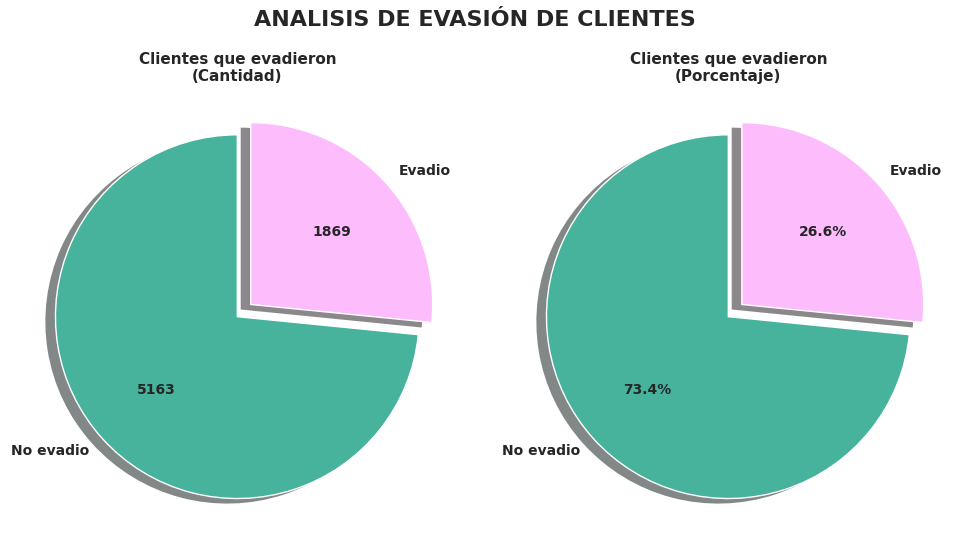

In [9]:
# DISTRIBUCION DE EVASIÓN

conteo_evasion = df_clientes_normalizado['desercion_cliente'].value_counts()
conteo_evasion_porcentajes = round(df_clientes_normalizado['desercion_cliente'].value_counts(normalize=True)*100, 2)

print(conteo_evasion)
print(conteo_evasion_porcentajes)

# POSIBLE GRAFICO: PIE

# grafico de tarta con la cantidad de clientes

sns.set_theme()

fig, axs = plt.subplots(1,2, figsize=(10, 6))
fig.suptitle('ANALISIS DE EVASIÓN DE CLIENTES', fontweight='bold', fontsize=16)

axs[0].pie(x=conteo_evasion,
           labels=['No evadio', 'Evadio'],
           startangle=90,
           colors=['#47B39D',"#FDBDFD"],
           shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},
           explode=(0, 0.1),
           autopct=lambda pct: f'{int(round(pct/100 * sum(conteo_evasion)))}',
           textprops={'fontsize': 10, 'fontweight': 'bold'})

axs[0].set_title('Clientes que evadieron\n(Cantidad)', fontsize=11, fontweight='bold')

# grafico de tarta con los porcentajes
axs[1].pie(x=conteo_evasion_porcentajes,
           labels=['No evadio', 'Evadio'],
           startangle=90,
           colors=['#47B39D',"#FDBDFD"],
           shadow={'ox': -0.04, 'edgecolor': 'none', 'shade': 0.9},
           explode=(0, 0.1),
           autopct=lambda pct: f'{pct:.1f}%',
           textprops={'fontsize': 10, 'fontweight': 'bold'})

axs[1].set_title('Clientes que evadieron\n(Porcentaje)', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('analisis_evasion_clientes.png', dpi=300)
plt.show()

Basandonos en lo representado en las graficas podemos notar que:

* En el periodo estudiado, notamos que un 26.6% de la clientela desertó de los servicios, es decir, aproximadamente 1 de cada 4 clientes no permanecio en la empresa.
* En nuestro contexto, es considerada una **cifra alta**
* Puede **impactar seriamente** la **rentabilidad** y el **crecimiento** de la empresa

# RECUENTO DE EVASIÓN POR VARIABLES CATEGORICAS

           No evadio  Evadio
genero                      
femenino        2544     939
masculino       2619     930


               No evadio  Evadio
tipo_contrato                   
dos años            1637      48
mes a mes           2220    1655
un año              1306     166


                                     No evadio  Evadio
metodo_pago                                           
cheque electrónico                        1294    1071
cheque por correo                         1296     308
tarjeta de crédito (automático)           1289     232
transferencia bancaria (automática)       1284     258


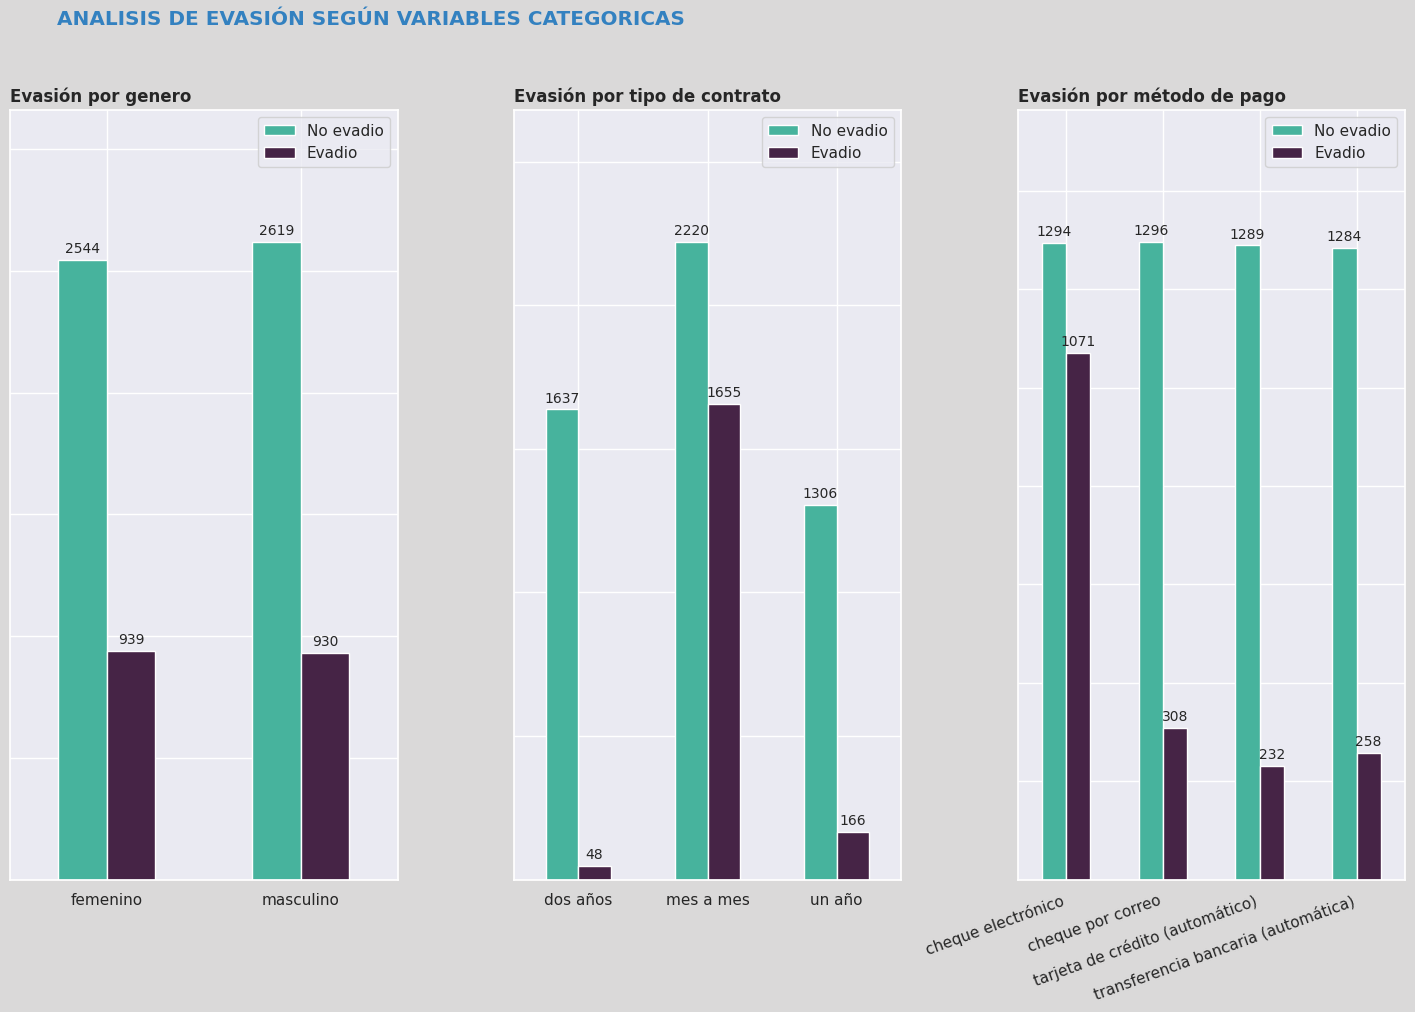

In [10]:
# RECUENTO DE EVASION POR VARIABLES CATEGORICAS

conteo_evasion_genero = df_clientes_normalizado.groupby(['genero', 'desercion_cliente']).size().unstack()
conteo_evasion_contrato = df_clientes_normalizado.groupby(['tipo_contrato', 'desercion_cliente']).size().unstack()
conteo_evasion_pago = df_clientes_normalizado.groupby(['metodo_pago','desercion_cliente']).size().unstack()

conteo_evasion_genero.columns = ['No evadio', 'Evadio']

conteo_evasion_contrato.columns = ['No evadio', 'Evadio']

conteo_evasion_pago.columns = ['No evadio', 'Evadio']

print(conteo_evasion_genero)
print('\n')
print(conteo_evasion_contrato)
print('\n')
print(conteo_evasion_pago)


# POSIBLE GRAFICO: CATPLOT (VER REFERENCIA SEABORN)

fig, axs = plt.subplots(1, 3, figsize=(18,10), gridspec_kw={'width_ratios': [2, 2, 2]})
fig.subplots_adjust(wspace=0.3)
# con .patch nos posicionamos en el lienzo, con .set_facecolor(color) cambiamos el color del mismo
fig.patch.set_facecolor("#dad9d9")
fig.suptitle('ANALISIS DE EVASIÓN SEGÚN VARIABLES CATEGORICAS', ha='right', color="#3381c0", fontweight='bold')


conteo_evasion_genero.plot(kind='bar',
                           ax=axs[0],
                           color=['#47B39D','#462446'])
axs[0].legend(loc='best')
axs[0].set_ylim(top=axs[0].get_ylim()[1] * 1.15)
axs[0].set_title('Evasión por genero', loc='left', fontweight='bold')
axs[0].set_xlabel('')
axs[0].set_ylabel('')
axs[0].set_xticklabels(labels=conteo_evasion_genero.index, rotation=0)
axs[0].tick_params(left=False, labelleft=False)

for container in axs[0].containers:
    axs[0].bar_label(container, label_type='edge', padding=3, fontsize=10)


conteo_evasion_contrato.plot(kind='bar',
                             ax=axs[1],
                             color=['#47B39D','#462446'])

axs[1].legend(loc='best')
axs[1].set_ylim(top=axs[1].get_ylim()[1] * 1.15)
axs[1].set_title('Evasión por tipo de contrato', loc='left', fontweight='bold')
axs[1].set_xlabel('')
axs[1].set_ylabel('')
axs[1].set_xticklabels(labels=conteo_evasion_contrato.index, rotation=0)
axs[1].tick_params(left=False, labelleft=False)

for container in axs[1].containers:
    axs[1].bar_label(container,
                     label_type='edge',
                     padding=3,
                     fontsize=10)

conteo_evasion_pago.plot(kind='bar',
                         ax=axs[2],
                         color=['#47B39D','#462446'])
axs[2].legend(loc='best')
axs[2].set_ylim(top=axs[2].get_ylim()[1] * 1.15)
axs[2].set_title('Evasión por método de pago', loc='left', fontweight='bold')
axs[2].set_xlabel('')
axs[2].set_ylabel('')
axs[2].set_xticklabels(labels=conteo_evasion_pago.index, rotation=20, ha='right')
axs[2].tick_params(left=False, labelleft=False)

for container in axs[2].containers:
    axs[2].bar_label(container,
                     label_type='edge',
                     padding=3,
                     fontsize=10)

plt.savefig('evasion_variables_categoricas.png', dpi=300)
plt.show()

En este análisis se buscaron patrones con base en variables categoricas como **género**, **tipo de contrato** y **método de pago**.


## 1. Evasión de género

* En ambos géneros, los números de evasiones son similares, con un **26.9%** para el género femenino y un **26.2%** para el género masculino.

* Esto indica que el problema no radica en un grupo demográfico en específico.

## 2. Evasión por tipo de contrato

* El tipo de contrato "mes a mes" es el que tiene la mayor tasa de evasión, con un **42.7%** de evasión.
* Los contratos de "2 años" y "un año" son aquellos en los que el cliente es menos propenso a evadir, con un **2.84%** y un **11.27%** respectivamente.
* Esto indica que los contratos más largos tienen un mayor poder de retención de clientes, puede deberse por la "fidelidad" que el cliente tenga con la empresa, por beneficios o por querer evitar una penalidad por incumplimiento de contrato.

## 3. Evasión por método de pago

* El cheque electrónico es el que presenta la mayor evasión, con un **45.28%**, le sigue (aunque un poco alejado) el cheque por correo, con un **19.2%**.
* La tarjeta de crédito representa una de las menores evasiones, con un **15,25%**, junto a la transferencia bancaria con un **16.73%** de evasión.
* Indica una mayor retención con los métodos de pago modernos que los tradicionales, posiblemente debiéndose a comodidad, automatización o facilidad de cobro para el propio cliente

# CONTEO DE EVASIÓN POR VARIABLES NUMERICAS



antiguedad          1    2    3   4   5   6   7   8   9   10  ...  63  64  65  \
desercion_cliente                                             ...               
False              233  115  106  93  69  70  80  81  73  71  ...  68  76  67   
True               380  123   94  83  64  40  51  42  46  45  ...   4   4   9   

antiguedad         66  67  68  69   70   71   72  
desercion_cliente                                 
False              76  88  91  87  108  164  356  
True               13  10   9   8   11    6    6  

[2 rows x 72 columns]
[(1, 6), (7, 12), (13, 18), (19, 24), (25, 30), (31, 36), (37, 42), (43, 48), (49, 54), (55, 60), (61, 66), (67, 72)]
desercion_cliente  False  True 
1-6                  686    784
7-12                 452    253
13-18                371    177
19-24                359    117
25-30                337     94
31-36                315     86
37-42                296     83
43-48                321     62
49-54                352     68
55-60   

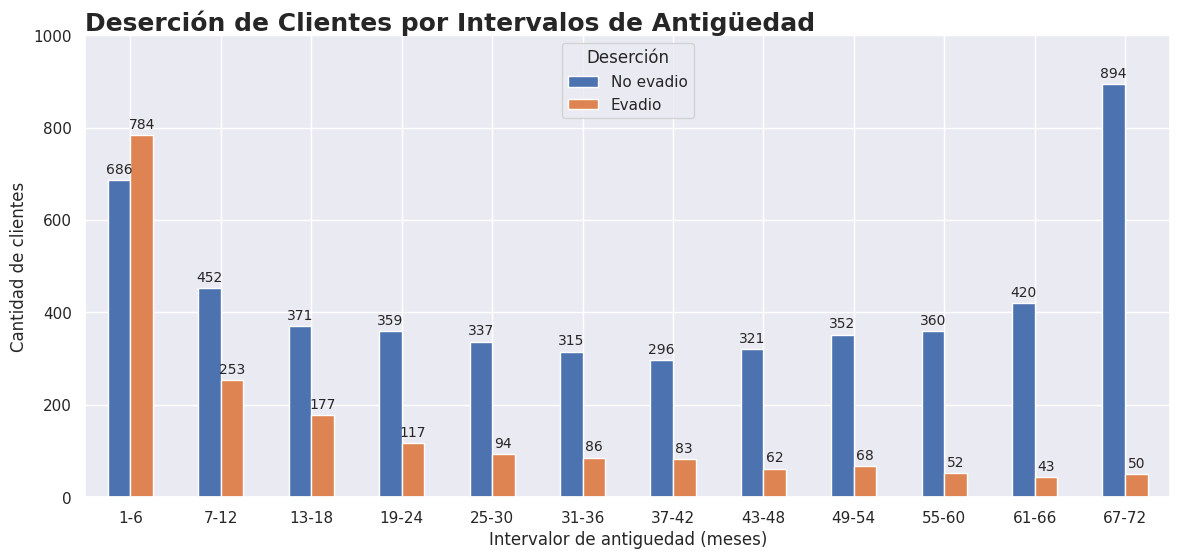

In [11]:
# CONTEO DE EVASION POR VARIABLES NUMERICAS

conteo_evasion_antiguedad = df_clientes_normalizado.groupby(['desercion_cliente', 'antiguedad']).size().unstack()

print('\n')
print(conteo_evasion_antiguedad)

# creamos una lista que almacenara valores entre 1 y 72 en tuplas dando pasos de 6 en 6
agrupaciones = [(i, i+5) for i in range(1, 73, 6)]
print(agrupaciones)

# creamos un df
df_conteo_antiguedad = pd.DataFrame()

for inicio, fin in agrupaciones:
    nombre_columna = f'{inicio}-{fin}'
    # creamos una columna nueva en el df, que recibira como valores la suma de aquellos registros que se encuentren en el rango especificado
    df_conteo_antiguedad[nombre_columna] = conteo_evasion_antiguedad.loc[:, inicio:fin].sum(axis=1)

df_conteo_antiguedad = df_conteo_antiguedad.T

print(df_conteo_antiguedad)

print(f'min: {df_conteo_antiguedad.min()}\nmax: {df_conteo_antiguedad.max()}')

fig, ax = plt.subplots(figsize=(14, 6))

df_conteo_antiguedad.plot(kind='bar',
                          ax=ax,
                          figsize=(14, 6))
ax.set_title('Deserción de Clientes por Intervalos de Antigüedad', loc='left', fontsize=18, fontweight='bold', pad=3)
ax.set_ylim(0, 1000)
ax.set_xlabel('Intervalor de antiguedad (meses)')
ax.set_ylabel('Cantidad de clientes')
ax.set_xticklabels(labels=df_conteo_antiguedad.index, rotation=0)
ax.legend(['No evadio', 'Evadio'],
          loc='upper center',
          title='Deserción')

for container in ax.containers:
    ax.bar_label(container, label_type='edge', padding=2.5, fontsize=10)

plt.savefig('evasion_por_antiguedad.png', dpi=300)
plt.show()

# Deserción de clientes por intervalos de antigüedad


Con base en lo representado en la gráfica, podemos notar lo siguiente:



* A mayor antigüedad, menor evasión, esto nos puede indicar que los clientes nuevos aún no están fidelizados con la empresa, y si el servicio que provee la empresa no cumple con las expectativas del cliente, la probabilidad de evasión es muy alta.

* Los clientes con más antigüedad en la empresa indicarían una mayor satisfacción con la empresa.

min clientes_true: 18.85
max clientes_true: 8684.8
min clientes_false: 18.8
max clientes_false: 8672.45

2        280.85
3       1237.85
4        267.40
18      2791.50
19        25.10
         ...   
7009    2030.30
7012     790.15
7025      70.15
7026      85.50
7028    1873.70
Name: cargos_total, Length: 1869, dtype: float64


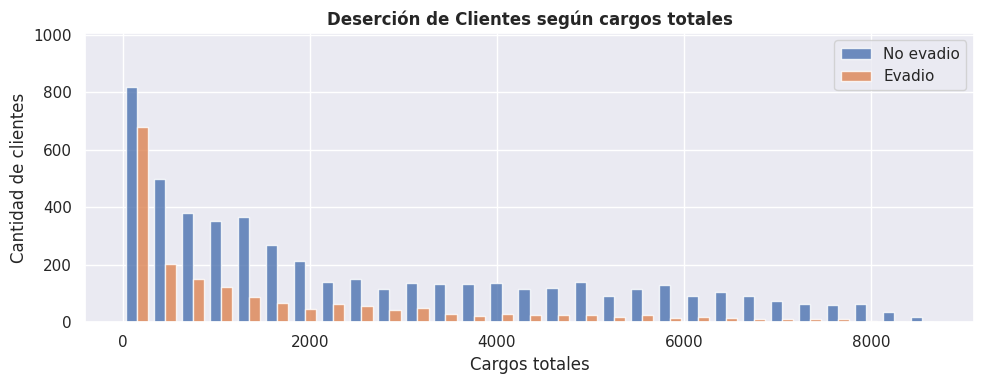

In [16]:
# evasion por cargos totales
clientes_true = df_clientes_normalizado[df_clientes_normalizado['desercion_cliente'] == True]['cargos_total']
clientes_false = df_clientes_normalizado[df_clientes_normalizado['desercion_cliente'] == False]['cargos_total']

print(f'min clientes_true: {clientes_true.min()}\nmax clientes_true: {clientes_true.max()}\nmin clientes_false: {clientes_false.min()}\nmax clientes_false: {clientes_false.max()}\n')

print(clientes_true)

# creamos los intervalos
bins = range(0, 9000, 300) # cada intervalo es de 300 unidades

fig, ax = plt.subplots(figsize=(10, 4))
ax.hist([clientes_false, clientes_true],
        bins=bins,
        label=['No evadio', 'Evadio'],
        stacked=False,
        alpha= 0.8)

ax.set_ylim(top=ax.get_ylim()[1] * 1.17)
ax.set_title('Deserción de Clientes según cargos totales', fontweight='bold')
ax.set_xlabel('Cargos totales')
ax.set_ylabel('Cantidad de clientes')
ax.legend()

plt.tight_layout()
plt.savefig('evasion_cargos_totales.png', dpi=300)
plt.show()

# DESERCIÓN DE CLIENTES SEGÚN CARGOS TOTALES


Basándonos en los datos representados en la gráfica, podemos notar que:



* Contrariamente a lo que uno podría pensar, el grupo de clientes que más dinero ha gastado, es de los que menos evasiones ha mostrado.

* Por otro lado, aquellos clientes que menos gastaron son los que manejan la probabilidad más alta de evasión.

* El grupo de clientes que más gasta está mucho más conforme con los servicios ofrecidos, lo que implica que sigan gastando más en la empresa.

# ***INFORME FINAL***

## Introducción




---



Este informe buscará resumir los hallazgos que obtuvimos en el análisis, donde se buscaron patrones que determinen la influencia que el cliente pudo haber tenido para abandonar la empresa, tales como el tipo de contrato, los gastos totales o el método de pago.



1. Gasto total



* Con base en lo representado en las gráficas, pudimos notar que aquellos clientes que gastaron menos son los que representaban la mayor tasa de evasión.

* Esto indica que el grupo con mayor nivel económico muestran una fidelidad mayor hacia la empresa y los servicios ofrecidos, pudiendo deberse a beneficios exclusivos o una mejor experiencia con la misma.



2. Antigüedad



* Aquellos clientes que tienen una menor antigüedad, son los más propensos a abandonar.

* Fallas en el periodo de bienvenida pueden ser el causante



3. Tipo de contrato



* Aquellos clientes con contrato mes a mes son los que mostraron una evasión mayor a los demás tipos de contrato.

* Puede deberse a que los clientes con este tipo de contrato tengan un menor poder adquisitivo, al no poder pagar por un contrato anual, optan por pagar mes a mes.

* En caso de que el precio del servicio cambie, pueden ser más propensos a abandonar la empresa en busca de pagar un monto menor.



---



## Recomendaciones:



###1. Mejorar el periodo de bienvenida

* Ofrecer beneficios para los primeros 6 meses es una opción, desde una rebaja en el servicio o incluir un servicio extra(Seguridad, Telefonía, Streaming, etc.)

* Hacer foco en la atención al cliente, para evitar posibles insatisfacciones.



###2. Ofrecer paquetes de servicios

* Incluir servicios en conjunto ()Ejemplo: Pack de streaming (Streaming TV + Streaming Películas).

* Dar a conocer al cliente dichos paquetes, destacando los beneficios de los mismos



### 3. Redefinir tarifas

* Ofrecer planes más flexibles o adaptados según el poder adquisitivo del cliente


---



## Conclusión





---





El análisis realizado identificó factores clave asociados a la evasión de clientes en Telecom X, como el gasto total, la antigüedad, etc.



A partir de los hallazgos, se proponen posibles estrategias orientadas principalmente a mejorar la experiencia inicial, tales como ofrecer paquetes atractivos y adaptar los planes a diferentes perfiles económicos, con el objetivo de aumentar la retención y reducir la tasa de evasión.